<a href="https://colab.research.google.com/github/Dennis-Kiarie/KNN-NAIVE-BAYES-CLASSIFIERS/blob/main/Moringa_Data_Science_Core_W9_Independent_Project_2021_Dennis_Kiarie_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Defining the question**

**a. Specifying the question**

Build a model to determine whether or not email details, indicate whether the e-mail was considered spam (1) or not (0).

**b. Defining the Metric for success**



*  Achieve an accuracy above 85%
*  Achieve F1 score above 85%



**c. Understanding the context**

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

For background on spam:

Cranor, Lorrie F., LaMacchia, Brian A. Spam!
Communications of the ACM, 41(8):74-83, 1998.

(a) Hewlett-Packard Internal-only Technical Report. External forthcoming.
(b) Determine whether a given email is spam or not.
(c) ~7% misclassification error. False positives (marking good mail as spam) are very undesirable.If we insist on zero false positives in the training/testing set, 20-25% of the spam passed through the filter.

**d. Recording Experimental Design**

CRISPS-DM methodology will be applied. Below steps will be undertaken to create the classifier:

*  Business understanding; understanding the background about the Spam.
*  Data understanding.
*  Data preparation
*  Exploratory Data Analysis.
*  Feature Engineering.
*  Data Modelling
*  Model Evaluation












**e. Data Relevance**

We will be using data extracted from a csv file . 


*   Dataset Creators:

Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt
Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304


*  Dataset Donor:

George Forman (gforman at nospam hpl.hp.com) 650-857-7835


The dataset to use for this project can be found by following this link:


*  Dataset Source:

https://archive.ics.uci.edu/ml/datasets/Spambase




Below is the Data description:


The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.


Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail.


The run-length attributes (55-57) measure the length of sequences of consecutive capital letters.


For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail.


 A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.


6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail


1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters


1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters


1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail


1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.


The spambase dataset has 4600 records and 58 columns.

**2.Read the Data**

In [1]:
# Let first import the necessary libraries
#---
# Data Manipulation Libraries
import pandas as pd
import numpy as np
import math
from scipy import stats

## Suppress scientific notation
#---
#
pd.set_option('display.float_format', lambda x: '%.3f' % x)

##Visualization Libraries
#---
#
import matplotlib.pyplot as plt
%matplotlib inline

## Graphics in retina format are more sharp and legible
#---
#
%config InlineBackend.figure_format='retina'
import seaborn as sns

## Modelling Libraries
#---
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, roc_curve, auc, f1_score, recall_score, precision_score, classification_report,confusion_matrix

## Hide warnings related to numpy
#---
# 
import warnings
warnings.filterwarnings('ignore')

In [2]:
##Increase rows and columns visible on notebook
#---
#
pd.set_option('display.max_rows' , 5000)
pd.set_option('display.max_colum' , 50)

In [3]:
##Import the Dataset
#---
#
spam = pd.read_csv('/content/spambase.data', sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True)

#preview the dataset
#---
#
spam.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,...,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.210,0.280,0.500,0.000,0.140,0.280,0.210,0.070,0.000,0.940,0.210,0.790,0.650,0.210,0.140,0.140,0.070,0.280,3.470,0.000,1.590,0.000,0.430,0.430,0.000,...,0.000,0.000,0.000,0.070,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,1
1,0.060,0.000,0.710,0.000,1.230,0.190,0.190,0.120,0.640,0.250,0.380,0.450,0.120,0.000,1.750,0.060,0.060,1.030,1.360,0.320,0.510,0.000,1.160,0.060,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.060,0.000,0.000,0.120,0.000,0.060,0.060,0.000,0.000,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,1
2,0.000,0.000,0.000,0.000,0.630,0.000,0.310,0.630,0.310,0.630,0.310,0.310,0.310,0.000,0.000,0.310,0.000,0.000,3.180,0.000,0.310,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,1
3,0.000,0.000,0.000,0.000,0.630,0.000,0.310,0.630,0.310,0.630,0.310,0.310,0.310,0.000,0.000,0.310,0.000,0.000,3.180,0.000,0.310,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,1
4,0.000,0.000,0.000,0.000,1.850,0.000,0.000,1.850,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.223,0.000,0.000,0.000,0.000,3.000,15,54,1


**3. Checking the data**

In [4]:
## Previewing of the dataset: Observation of snapshot of dataset
#use the sample function that will provide us with a better outlook of our dataset
#---
#
spam.sample(10)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,...,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
592,0.000,0.000,0.550,0.000,0.220,0.220,0.110,0.000,0.110,0.220,0.000,0.330,0.330,0.000,0.000,0.000,0.220,0.000,0.000,0.000,0.000,0.000,0.550,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.155,0.000,0.034,0.120,0.000,1.961,14,302,1
2782,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.320,0.000,1.160,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.408,0.000,0.000,0.000,0.000,2.125,17,51,0
1604,0.400,0.180,0.320,0.000,0.250,0.180,0.030,1.010,0.400,0.400,0.100,0.720,0.650,0.360,0.250,0.540,0.360,0.360,3.050,0.140,1.410,0.000,0.290,0.760,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.030,0.000,0.000,0.000,0.000,0.070,0.000,0.000,0.000,0.012,0.042,0.072,0.334,0.139,0.000,3.305,181,1613,1
3075,0.370,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.370,0.000,2.230,0.000,0.370,0.000,0.000,0.000,1.110,...,0.370,0.370,0.370,0.740,0.000,0.740,0.370,0.370,0.000,0.740,0.000,0.370,0.370,0.000,0.000,0.000,0.192,0.064,0.320,0.000,0.064,1.923,17,177,0
2162,0.000,0.000,0.000,0.000,0.310,0.000,0.310,0.000,0.310,0.000,0.310,0.310,0.000,0.000,0.000,0.000,0.000,0.310,0.630,0.000,0.630,0.000,0.000,0.000,0.000,...,0.630,0.000,0.000,0.310,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.630,0.000,0.000,0.000,0.000,0.255,0.102,0.000,0.000,0.255,3.547,46,259,0
1295,0.000,0.000,0.000,0.000,1.210,0.000,0.800,0.000,0.000,0.800,0.400,0.800,0.400,0.000,0.000,1.610,0.000,0.000,1.610,0.000,1.210,0.800,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.070,0.000,0.210,0.000,0.070,4.490,24,229,1
1834,0.180,0.060,0.240,0.000,0.180,0.000,0.000,0.180,0.000,0.120,0.000,0.600,0.000,0.000,0.000,0.240,0.120,0.000,0.780,0.000,0.720,0.000,0.060,0.420,1.930,...,0.000,0.420,0.000,0.180,0.000,0.240,0.000,0.000,0.120,0.000,0.000,0.180,0.000,0.000,0.120,0.000,0.196,0.000,0.044,0.026,0.000,1.873,29,843,0
1156,1.240,0.000,0.820,0.000,0.000,0.000,0.410,0.000,0.000,0.410,0.000,0.410,0.000,0.000,0.000,1.650,0.410,0.000,2.900,0.000,0.410,0.000,0.410,0.820,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.193,0.000,0.904,5.300,0.000,7.478,92,344,1
1535,0.160,0.000,0.320,0.000,1.300,0.650,0.000,0.650,0.000,0.000,0.000,0.160,0.000,0.000,0.160,0.320,1.630,2.450,1.790,0.000,1.140,0.000,0.000,0.320,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.490,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.027,0.000,0.622,0.027,0.000,1.250,12,165,1
1102,0.000,0.000,0.370,0.000,1.130,0.000,0.370,0.000,0.000,0.750,0.000,0.370,0.000,0.000,0.000,0.370,0.750,0.000,2.650,0.000,1.130,0.000,0.370,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.130,0.000,0.000,0.000,0.000,0.063,0.000,0.882,0.189,0.000,4.080,78,253,1


In [5]:
## Determining the shape of our new dataset
#---
#
spam.shape

(4600, 58)

There are 4600 records and 58 columns.

In [6]:
##Previewing our columns
#--
#
spam.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

In [7]:
## Checking whether each column has an appropriate datatype
#---
#
print("Datatypes for sailing dataset: ")
print(spam.dtypes)
print("*****************")

Datatypes for sailing dataset: 
0         float64
0.64      float64
0.64.1    float64
0.1       float64
0.32      float64
0.2       float64
0.3       float64
0.4       float64
0.5       float64
0.6       float64
0.7       float64
0.64.2    float64
0.8       float64
0.9       float64
0.10      float64
0.32.1    float64
0.11      float64
1.29      float64
1.93      float64
0.12      float64
0.96      float64
0.13      float64
0.14      float64
0.15      float64
0.16      float64
0.17      float64
0.18      float64
0.19      float64
0.20      float64
0.21      float64
0.22      float64
0.23      float64
0.24      float64
0.25      float64
0.26      float64
0.27      float64
0.28      float64
0.29      float64
0.30      float64
0.31      float64
0.32.2    float64
0.33      float64
0.34      float64
0.35      float64
0.36      float64
0.37      float64
0.38      float64
0.39      float64
0.40      float64
0.41      float64
0.42      float64
0.778     float64
0.43      float64
0.44      floa

In [8]:
##Previewing the top of sailing dataset
#---
#
spam.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,...,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.210,0.280,0.500,0.000,0.140,0.280,0.210,0.070,0.000,0.940,0.210,0.790,0.650,0.210,0.140,0.140,0.070,0.280,3.470,0.000,1.590,0.000,0.430,0.430,0.000,...,0.000,0.000,0.000,0.070,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,1
1,0.060,0.000,0.710,0.000,1.230,0.190,0.190,0.120,0.640,0.250,0.380,0.450,0.120,0.000,1.750,0.060,0.060,1.030,1.360,0.320,0.510,0.000,1.160,0.060,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.060,0.000,0.000,0.120,0.000,0.060,0.060,0.000,0.000,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,1
2,0.000,0.000,0.000,0.000,0.630,0.000,0.310,0.630,0.310,0.630,0.310,0.310,0.310,0.000,0.000,0.310,0.000,0.000,3.180,0.000,0.310,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,1
3,0.000,0.000,0.000,0.000,0.630,0.000,0.310,0.630,0.310,0.630,0.310,0.310,0.310,0.000,0.000,0.310,0.000,0.000,3.180,0.000,0.310,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,1
4,0.000,0.000,0.000,0.000,1.850,0.000,0.000,1.850,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.223,0.000,0.000,0.000,0.000,3.000,15,54,1


In [9]:
##previewing the bottom of sailing dataset
#---
#
spam.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,...,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.310,0.000,0.620,0.000,0.000,0.310,0.000,0.000,0.000,0.000,0.000,1.880,0.000,0.000,0.000,0.000,0.000,0.000,0.620,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.310,0.310,0.310,0.000,0.000,0.000,0.232,0.000,0.000,0.000,0.000,1.142,3,88,0
4596,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000,0.000,2.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.353,0.000,0.000,1.555,4,14,0
4597,0.300,0.000,0.300,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.800,0.300,0.000,0.000,0.000,0.000,0.900,1.500,0.000,0.300,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.200,0.000,0.000,0.102,0.718,0.000,0.000,0.000,0.000,1.404,6,118,0
4598,0.960,0.000,0.000,0.000,0.320,0.000,0.000,0.000,0.000,0.000,0.000,0.320,0.000,0.000,0.000,0.000,0.000,0.000,1.930,0.000,0.320,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.320,0.000,0.320,0.000,0.000,0.000,0.057,0.000,0.000,0.000,0.000,1.147,5,78,0
4599,0.000,0.000,0.650,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.650,0.000,0.000,0.000,0.000,0.000,4.600,0.000,0.650,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.970,0.650,0.000,0.000,0.000,0.000,0.000,0.125,0.000,0.000,1.250,5,40,0


# 4. Tidying the dataset

In [10]:
## We check how many columns have missing values
#---
#
def show_missing(dataframe_name):
  missing_all= dataframe_name.columns[spam.isnull().any()].tolist()
  more_than_zero=dataframe_name[missing_all].isnull().sum().sort_values(ascending=False)
  percentage=more_than_zero/dataframe_name.shape[0]*100
  return more_than_zero,percentage 

In [11]:
## Let's see the missing values
#--
#
show_missing(spam)

(Series([], dtype: float64), Series([], dtype: float64))

In [12]:
##we check for null values
#---
#
spam.isnull().sum()

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.32.2    0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.778     0
0.43      0
0.44      0
3.756     0
61        0
278       0
1         0
dtype: int64

Our dataset has no missing values

In [13]:
##check for duplicates
#---
#
#check for duplicates
spam.duplicated().sum()

391

There are 391 duplicates so we continue with data cleaning

In [14]:
## Drop all duplicates
#---
#
spam.drop_duplicates(inplace=True)

##preview 
#---
#
spam.duplicated().sum()

0

In [15]:
##we confirm if the duplicate row has been dropped, we check the shape again
#---
#

print('We now have ', spam.shape[0], 'rows and ', spam.shape[1], 'columns')

We now have  4209 rows and  58 columns


In [16]:
##checking for anomalies
#---
#

##Checking outliers
#---
# 

## quantiles
#---
#
Q1 = spam.quantile(0.25)
Q3 = spam.quantile(0.75)
IQR = Q3 - Q1

## Removing outliers based on the IQR range 
#---
# 
df= spam[~((spam < (Q1 - 1.5 * IQR)) | (spam > (Q3 + 1.5 * IQR))).any(axis=1)]

## Printing the shape of our new dataset
#---
# 
print('The shape of our new dataset is :',df.shape)

## Printing the shape of our old dataset
#---
#
print('The shape of our old dataset is :',spam.shape)

The shape of our new dataset is : (114, 58)
The shape of our old dataset is : (4209, 58)


In [17]:
##Check for unique values in each column
#---
#
for col in df.columns.to_list():
  print(f'{col} column unique values: \n')
  print(df[col].unique(), end='\n')
  print('**********')
  print('\n')

0 column unique values: 

[0.]
**********


0.64 column unique values: 

[0.]
**********


0.64.1 column unique values: 

[0.   0.75 0.51 0.41]
**********


0.1 column unique values: 

[0.]
**********


0.32 column unique values: 

[0.94 0.   0.81 0.92 0.48 0.17]
**********


0.2 column unique values: 

[0.]
**********


0.3 column unique values: 

[0.]
**********


0.4 column unique values: 

[0.]
**********


0.5 column unique values: 

[0.]
**********


0.6 column unique values: 

[0.   0.36 0.41]
**********


0.7 column unique values: 

[0.]
**********


0.64.2 column unique values: 

[0.   1.81 1.14 0.75 1.85 1.   0.89 1.92 2.   1.16 0.92 0.6  1.88 0.48
 0.34 1.25]
**********


0.8 column unique values: 

[0.]
**********


0.9 column unique values: 

[0.]
**********


0.10 column unique values: 

[0.]
**********


0.32.1 column unique values: 

[0.]
**********


0.11 column unique values: 

[0.]
**********


1.29 column unique values: 

[0.]
**********


1.93 column unique values:

In [18]:
##Checking datatypes to validate that no column has object datatypes
#---
#
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 15 to 4546
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       114 non-null    float64
 1   0.64    114 non-null    float64
 2   0.64.1  114 non-null    float64
 3   0.1     114 non-null    float64
 4   0.32    114 non-null    float64
 5   0.2     114 non-null    float64
 6   0.3     114 non-null    float64
 7   0.4     114 non-null    float64
 8   0.5     114 non-null    float64
 9   0.6     114 non-null    float64
 10  0.7     114 non-null    float64
 11  0.64.2  114 non-null    float64
 12  0.8     114 non-null    float64
 13  0.9     114 non-null    float64
 14  0.10    114 non-null    float64
 15  0.32.1  114 non-null    float64
 16  0.11    114 non-null    float64
 17  1.29    114 non-null    float64
 18  1.93    114 non-null    float64
 19  0.12    114 non-null    float64
 20  0.96    114 non-null    float64
 21  0.13    114 non-null    float64
 22  

We will proceed to Analysis with a dataset which contains outliers so as to draw much insight from the data.

**5. External Data Source Validation**

**6. Exploratory Data Analysis**

**a. Univariate Analysis**

In [19]:

##plotting a frequency distribution of variable values
#---
#

# Frequency distribution of values in variables
for var in spam.columns:
    
    print(df[var].value_counts())

0.000    114
Name: 0, dtype: int64
0.000    114
Name: 0.64, dtype: int64
0.000    111
0.510      1
0.410      1
0.750      1
Name: 0.64.1, dtype: int64
0.000    114
Name: 0.1, dtype: int64
0.000    107
0.810      2
0.940      2
0.920      1
0.480      1
0.170      1
Name: 0.32, dtype: int64
0.000    114
Name: 0.2, dtype: int64
0.000    114
Name: 0.3, dtype: int64
0.000    114
Name: 0.4, dtype: int64
0.000    114
Name: 0.5, dtype: int64
0.000    112
0.360      1
0.410      1
Name: 0.6, dtype: int64
0.000    114
Name: 0.7, dtype: int64
0.000    98
1.920     2
0.480     1
1.850     1
0.600     1
1.880     1
1.160     1
0.920     1
1.810     1
0.890     1
1.250     1
1.140     1
0.340     1
2.000     1
1.000     1
0.750     1
Name: 0.64.2, dtype: int64
0.000    114
Name: 0.8, dtype: int64
0.000    114
Name: 0.9, dtype: int64
0.000    114
Name: 0.10, dtype: int64
0.000    114
Name: 0.32.1, dtype: int64
0.000    114
Name: 0.11, dtype: int64
0.000    114
Name: 1.29, dtype: int64
0.000    65
5

In [20]:
##Describe numerical variables
#---
#
spam.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,...,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,...,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000,4209.000
mean,0.104,0.113,0.291,0.063,0.325,0.097,0.118,0.108,0.092,0.248,0.057,0.565,0.098,0.061,0.045,0.254,0.149,0.188,1.718,0.085,0.810,0.132,0.101,0.091,0.574,...,0.046,0.108,0.099,0.144,0.014,0.084,0.061,0.041,0.142,0.049,0.085,0.320,0.189,0.006,0.035,0.040,0.144,0.017,0.281,0.076,0.046,5.384,52.138,291.185,0.399
std,0.300,0.454,0.516,1.353,0.688,0.276,0.397,0.410,0.282,0.657,0.184,0.883,0.309,0.346,0.242,0.798,0.458,0.541,1.769,0.506,1.149,1.071,0.351,0.432,1.677,...,0.302,0.530,0.387,0.425,0.231,0.448,0.320,0.318,0.794,0.232,0.646,1.046,0.928,0.079,0.299,0.253,0.274,0.106,0.843,0.240,0.436,33.151,199.606,618.728,0.490
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.627,7.000,40.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.190,0.000,0.000,0.000,0.000,0.000,0.000,1.360,0.000,0.290,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.073,0.000,0.016,0.000,0.000,2.297,15.000,101.000,0.000
75%,0.000,0.000,0.440,0.000,0.410,0.000,0.000,0.000,0.000,0.190,0.000,0.830,0.000,0.000,0.000,0.120,0.000,0.000,2.720,0.000,1.280,0.000,0.000,0.000,0.100,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.170,0.000,0.000,0.000,0.000,0.194,0.000,0.331,0.053,0.000,3.706,44.000,273.000,1.000
max,4.540,14.280,5.100,42.810,10.000,5.880,7.270,11.110,5.260,18.180,2.610,9.670,5.550,10.000,4.410,20.000,7.140,9.090,18.750,18.180,11.110,17.100,5.450,12.500,20.830,...,4.760,20.000,7.690,6.890,8.330,11.110,4.760,7.140,14.280,3.570,20.000,21.420,22.050,2.170,10.000,4.385,9.752,4.081,32.478,6.003,19.829,1102.500,9989.000,15841.000,1.000


**Observation**

The spam dataset column names are unnamed . So, we failed to plot the Histogram, Boxplot .

Also, we agreed not to perform both the Bivariate and Multivariate analysis of the unstructured data. This is because interpreting Correlation cofficient with unnamed column would be very difficult. 

#7. Implementing the solution 

In [21]:
##check the dataset datatypes 
#---
#
spam.dtypes

0         float64
0.64      float64
0.64.1    float64
0.1       float64
0.32      float64
0.2       float64
0.3       float64
0.4       float64
0.5       float64
0.6       float64
0.7       float64
0.64.2    float64
0.8       float64
0.9       float64
0.10      float64
0.32.1    float64
0.11      float64
1.29      float64
1.93      float64
0.12      float64
0.96      float64
0.13      float64
0.14      float64
0.15      float64
0.16      float64
0.17      float64
0.18      float64
0.19      float64
0.20      float64
0.21      float64
0.22      float64
0.23      float64
0.24      float64
0.25      float64
0.26      float64
0.27      float64
0.28      float64
0.29      float64
0.30      float64
0.31      float64
0.32.2    float64
0.33      float64
0.34      float64
0.35      float64
0.36      float64
0.37      float64
0.38      float64
0.39      float64
0.40      float64
0.41      float64
0.42      float64
0.778     float64
0.43      float64
0.44      float64
3.756     float64
61        

In [22]:
##Convert to integer
#---
#
df2 = spam.astype(int)

##Recheck the datatypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4209 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       4209 non-null   int64
 1   0.64    4209 non-null   int64
 2   0.64.1  4209 non-null   int64
 3   0.1     4209 non-null   int64
 4   0.32    4209 non-null   int64
 5   0.2     4209 non-null   int64
 6   0.3     4209 non-null   int64
 7   0.4     4209 non-null   int64
 8   0.5     4209 non-null   int64
 9   0.6     4209 non-null   int64
 10  0.7     4209 non-null   int64
 11  0.64.2  4209 non-null   int64
 12  0.8     4209 non-null   int64
 13  0.9     4209 non-null   int64
 14  0.10    4209 non-null   int64
 15  0.32.1  4209 non-null   int64
 16  0.11    4209 non-null   int64
 17  1.29    4209 non-null   int64
 18  1.93    4209 non-null   int64
 19  0.12    4209 non-null   int64
 20  0.96    4209 non-null   int64
 21  0.13    4209 non-null   int64
 22  0.14    4209 non-null   int64
 23  0.15    4209 

In [23]:
## Preview the first five records 
df2.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,...,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,101,1028,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,485,2259,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,40,191,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,40,191,1
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,15,54,1


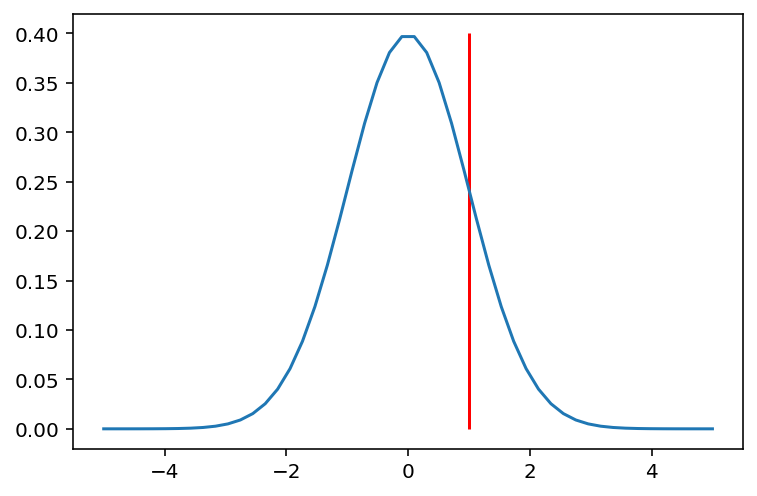

In [24]:
##Check for Gaussian
#---
#
from scipy.stats import norm
x = np.linspace(-5, 5)
y = norm.pdf(x)
plt.plot(x, y)
plt.vlines(ymin=0, ymax=0.4, x=1, colors=['red'])

**a. Part A: 80:20 Partition**

In [25]:
# Splitting our dataset into its attributes and labels
# ---
#
##The X variable contains the first 58 columns of the dataset (i.e. attributes) while y contains the labels.
# ---
# 
X = df2.iloc[:, :58].values
y = df2.iloc[:, 57].values

In [26]:
##Splitting our data into a training set and a test set
#---
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

In [27]:
##preview the shape of train and test sets
#---
#
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3367, 58)
(3367,)
(842, 58)
(842,)


In [28]:
##feature scaling 
#normalization
#---
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.13026334, -0.11547674, -0.27402343, ..., -0.12240002,
        -0.23183993, -0.81862011],
       [-0.13026334, -0.11547674, -0.27402343, ..., -0.2294577 ,
        -0.43384244, -0.81862011],
       [-0.13026334, -0.11547674, -0.27402343, ...,  0.29186666,
         5.06563677,  1.22156784],
       ...,
       [-0.13026334, -0.11547674, -0.27402343, ..., -0.23411239,
        -0.44167199, -0.81862011],
       [-0.13026334, -0.11547674, -0.27402343, ..., -0.20152961,
        -0.3571128 ,  1.22156784],
       [-0.13026334, -0.11547674, -0.27402343, ..., -0.12240002,
         0.65289975, -0.81862011]])

In [29]:
##import the model
#---
# 
from sklearn.naive_bayes import GaussianNB

##instantiating the model
#---
#
clf = GaussianNB() 

##fitting the model to the training set
#---
#
model = clf.fit(X_train, y_train) 


In [30]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))


0.998812351543943


In [31]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = clf.predict(X_test)

## predict based on the model we have trained
#---
#

comparison_frame=pd.DataFrame({'Actual': y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame.sample(5)

,Actual,predicted
71,1,1
560,0,0
569,1,1
350,0,0
329,0,0


In [32]:
## Evaluating the algorithm
#---
#
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))

##Print the Confusion Matrix with k =5 and slice it into four pieces
#---
#
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

[[515   0]
 [  1 326]]


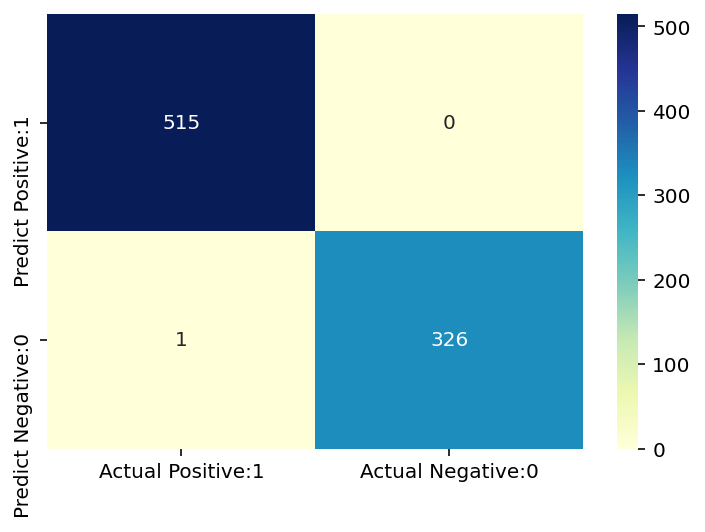

In [33]:
##visualizing the confusion matrix with seaborn heatmap
#---
#
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [34]:
## Classification metrices
#---
#
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       515
           1       1.00      1.00      1.00       327

    accuracy                           1.00       842
   macro avg       1.00      1.00      1.00       842
weighted avg       1.00      1.00      1.00       842



In [35]:
##Checking the accuracy score
#---
#
from sklearn.metrics import accuracy_score
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Accuracy0.998812351543943
Model accuracy score: 0.9988


In [36]:
## Model Results
#---
#

## We create a DataFrame to store results
#---
#
dict={
    
    'Model':['K-Nearest Neighbors', 'Naive Bayes','Logistic Regression',
               'Decision Tree','Support Vector Machines'],
    'R2':[0,0,0,0,0],
    'Accuracy Score':[0,0,0,0,0],
    'F1 Score':[0,0,0,0,0],
    'Recall':[0,0,0,0,0],
    'Precision':[0,0,0,0,0],
    'RMSE':[0,0,0,0,0],
    'TP':[0,0,0,0,0],
    'TN':[0,0,0,0,0],
    'FP':[0,0,0,0,0],
    'FN':[0,0,0,0,0]
    }
df_results=pd.DataFrame(dict,columns=['Model','R2','Accuracy_Score','Recall','Precision','RMSE','TP','TN','FP','FN'])

In [37]:

def model_results(model_type,y_test_data,y_prediction_data):
  index_val=df_results[df_results['Model']==model_type].index

## Assigning scores to a dataframe 
  df_results.loc[index_val,'F1 Score']=f1_score(y_test_data,y_prediction_data, average='weighted')
  df_results.loc[index_val,'Accuracy Score']=accuracy_score(y_test_data, y_prediction_data)
  df_results.loc[index_val,'Recall']=recall_score(y_test_data, y_prediction_data, average='weighted')
  df_results.loc[index_val,'Precission']=f1_score(y_test_data, y_prediction_data, average='weighted')
  df_results.loc[index_val,'RMSE']=np.sqrt(mean_squared_error(np.array(y_test_data), y_prediction_data))
  df_results.loc[index_val,'R2']=r2_score(y_test_data, y_prediction_data)
  tn,fp, fn,tp=confusion_matrix(y_test_data, y_prediction_data).ravel()
  df_results.loc[index_val, 'TP']=tp
  df_results.loc[index_val, 'TN']=tn
  df_results.loc[index_val, 'FP']=fp
  df_results.loc[index_val, 'FN']=fn

  return(df_results)


model_results('K-Nearest Neighbors' , y_test, y_pred)



,Model,R2,Accuracy_Score,Recall,Precision,RMSE,TP,TN,FP,FN,F1 Score,Accuracy Score,Precission
0,K-Nearest Neighbors,0.995,NaN,0.999,0,0.034,326,515,0,1,0.999,0.999,0.999
1,Naive Bayes,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan
2,Logistic Regression,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan
3,Decision Tree,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan
4,Support Vector Machines,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan


**Observation**

We have more negative than positive hence our data is imbalanced.

K-Nearest Neighbor is the best model with F1 Score OF 99% . This accuracy level is a point of concern as it could imply overfitting. This requires checking of confusion matrix .

From confusion matrix , True Positive are 326. True Negative are 515. False negative is 0. False positive is 0. Hence no test records were misclassified.


**b. Part B: 70:30 Partition**

In [63]:
# Splitting our dataset into its attributes and labels
# ---
#
##The X variable contains the first 58 columns of the dataset (i.e. attributes) while y contains the labels.
# ---
# 
X = df2.iloc[:, :58].values
y = df2.iloc[:, 57].values

In [64]:
##Splitting our data into a training set and a test set
#---
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6) 

In [65]:
##preview the shape of train and test sets
#---
#
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2946, 58)
(2946,)
(1263, 58)
(1263,)


In [66]:
##feature scaling 
#normalization
#---
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.12674979, -0.11390778, -0.27399542, ..., -0.21578474,
        -0.41791446, -0.81338215],
       [-0.12674979, -0.11390778, -0.27399542, ..., -0.20684586,
        -0.27861358, -0.81338215],
       [-0.12674979, -0.11390778,  2.23280743, ...,  0.13730101,
         0.61472902,  1.2294344 ],
       ...,
       [-0.12674979, -0.11390778, -0.27399542, ..., -0.22472362,
        -0.43305586, -0.81338215],
       [-0.12674979, -0.11390778, -0.27399542, ..., -0.19343754,
        -0.3512923 ,  1.2294344 ],
       [-0.12674979, -0.11390778, -0.27399542, ..., -0.11745706,
         0.625328  , -0.81338215]])

In [67]:
##import the model
#---
# 
from sklearn.naive_bayes import GaussianNB

##instantiating the model
#---
#
clf = GaussianNB() 

##fitting the model to the training set
#---
#
model = clf.fit(X_train, y_train) 

In [69]:
##Instanitiating & Training our model
#---
# 
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [70]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))


0.9992082343626286


In [73]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = clf.predict(X_test)

## predict based on the model we have trained
#---
#

comparison_frame=pd.DataFrame({'Actual': y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame.sample(5)

,Actual,predicted
90,0,0
1074,1,1
932,0,0
957,1,1
1236,1,1


In [74]:
## Evaluating the algorithm
#---
#
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))

##Print the Confusion Matrix with k =5 and slice it into four pieces
#---
#
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

[[758   0]
 [  1 504]]


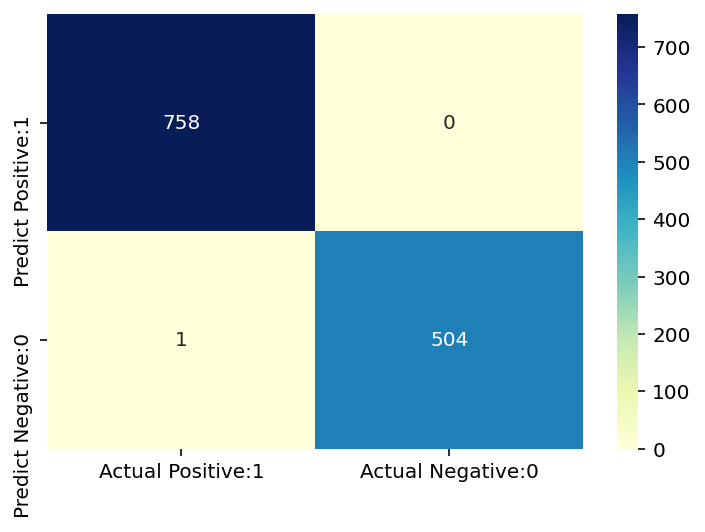

In [75]:
##visualizing the confusion matrix with seaborn heatmap
#---
#
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [76]:
## Classification metrices
#---
#
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       758
           1       1.00      1.00      1.00       505

    accuracy                           1.00      1263
   macro avg       1.00      1.00      1.00      1263
weighted avg       1.00      1.00      1.00      1263



In [77]:
##Checking the accuracy score
#---
#
from sklearn.metrics import accuracy_score
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy0.9992082343626286
Model accuracy score: 0.9992


In [78]:
## Model Results
#---
#

## We create a DataFrame to store results
#---
#
dict={
    
    'Model':['K-Nearest Neighbors', 'Naive Bayes','Logistic Regression',
               'Decision Tree','Support Vector Machines'],
    'R2':[0,0,0,0,0],
    'Accuracy Score':[0,0,0,0,0],
    'F1 Score':[0,0,0,0,0],
    'Recall':[0,0,0,0,0],
    'Precision':[0,0,0,0,0],
    'RMSE':[0,0,0,0,0],
    'TP':[0,0,0,0,0],
    'TN':[0,0,0,0,0],
    'FP':[0,0,0,0,0],
    'FN':[0,0,0,0,0]
    }
df_results=pd.DataFrame(dict,columns=['Model','R2','Accuracy_Score','Recall','Precision','RMSE','TP','TN','FP','FN'])

In [79]:

def model_results(model_type,y_test_data,y_prediction_data):
  index_val=df_results[df_results['Model']==model_type].index

## Assigning scores to a dataframe 
  df_results.loc[index_val,'F1 Score']=f1_score(y_test_data,y_prediction_data, average='weighted')
  df_results.loc[index_val,'Accuracy Score']=accuracy_score(y_test_data, y_prediction_data)
  df_results.loc[index_val,'Recall']=recall_score(y_test_data, y_prediction_data, average='weighted')
  df_results.loc[index_val,'Precission']=f1_score(y_test_data, y_prediction_data, average='weighted')
  df_results.loc[index_val,'RMSE']=np.sqrt(mean_squared_error(np.array(y_test_data), y_prediction_data))
  df_results.loc[index_val,'R2']=r2_score(y_test_data, y_prediction_data)
  tn,fp, fn,tp=confusion_matrix(y_test_data, y_prediction_data).ravel()
  df_results.loc[index_val, 'TP']=tp
  df_results.loc[index_val, 'TN']=tn
  df_results.loc[index_val, 'FP']=fp
  df_results.loc[index_val, 'FN']=fn

  return(df_results)


model_results('K-Nearest Neighbors' , y_test, y_pred)



,Model,R2,Accuracy_Score,Recall,Precision,RMSE,TP,TN,FP,FN,F1 Score,Accuracy Score,Precission
0,K-Nearest Neighbors,0.997,NaN,0.999,0,0.028,504,758,0,1,0.999,0.999,0.999
1,Naive Bayes,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan
2,Logistic Regression,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan
3,Decision Tree,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan
4,Support Vector Machines,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan


**Observation**

There are more negatives than positives showing that our data is imbalanced.
K-Nearest Neighbors is the best model and F1 Score is the best measure. The F1 Score is 99%

This accuracy level is a point of interest as it could imply overfitting. This requires checking of confusion matrix .

From confusion matrix , True Positive are 504. True Negative are 758. False negative is 0. False positive is 0. Hence no test records were misclassified.


**C. Part C: 60:40 Partition**

In [81]:
# Splitting our dataset into its attributes and labels
# ---
#
##The X variable contains the first 58 columns of the dataset (i.e. attributes) while y contains the labels.
# ---
# 
X = df2.iloc[:, :58].values
y = df2.iloc[:, 57].values

In [82]:
##Splitting our data into a training set and a test set
#---
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6) 

In [83]:
##preview the shape of train and test sets
#---
#
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2525, 58)
(2525,)
(1684, 58)
(1684,)


In [84]:
##feature scaling 
#normalization
#---
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.12573473, -0.11446855,  2.26738828, ...,  1.02998008,
         0.05962511,  1.23798134],
       [-0.12573473, -0.11446855, -0.26811013, ..., -0.09307447,
        -0.29547316,  1.23798134],
       [-0.12573473, -0.11446855, -0.26811013, ..., -0.18274803,
        -0.38631225, -0.80776662],
       ...,
       [-0.12573473, -0.11446855, -0.26811013, ..., -0.21690938,
        -0.47054486, -0.80776662],
       [-0.12573473, -0.11446855, -0.26811013, ..., -0.1870182 ,
        -0.38135739,  1.23798134],
       [-0.12573473, -0.11446855, -0.26811013, ..., -0.11442532,
         0.68393742, -0.80776662]])

In [85]:
##import the model
#---
# 
from sklearn.naive_bayes import GaussianNB

##instantiating the model
#---
#
clf = GaussianNB() 

##fitting the model to the training set
#---
#
model = clf.fit(X_train, y_train) 

In [86]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.9994061757719715


In [88]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = clf.predict(X_test)

## predict based on the model we have trained
#---
#

comparison_frame=pd.DataFrame({'Actual': y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame.sample(5)

,Actual,predicted
1620,1,1
971,0,0
1194,1,1
928,1,1
828,0,0


In [89]:
## Evaluating the algorithm
#---
#
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))

##Print the Confusion Matrix with k =5 and slice it into four pieces
#---
#
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

[[1003    0]
 [   1  680]]


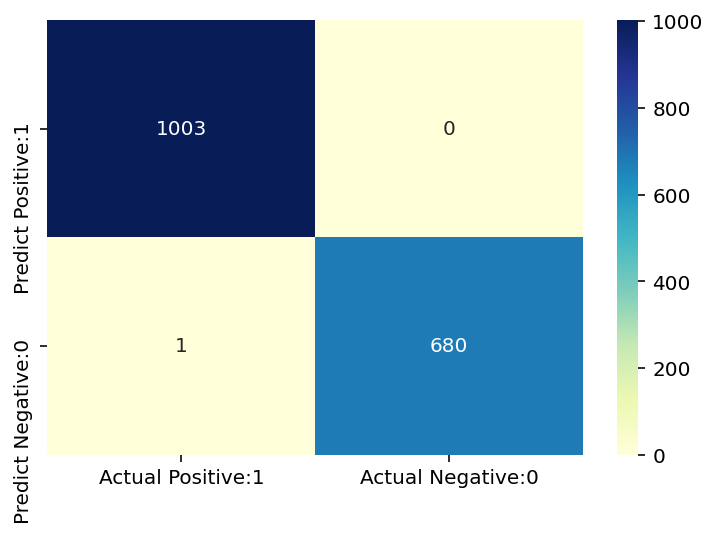

In [90]:
##visualizing the confusion matrix with seaborn heatmap
#---
#
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [91]:
## Classification metrices
#---
#
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1003
           1       1.00      1.00      1.00       681

    accuracy                           1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684



In [92]:
## Model Results
#---
#

## We create a DataFrame to store results
#---
#
dict={
    
    'Model':['K-Nearest Neighbors', 'Naive Bayes','Logistic Regression',
               'Decision Tree','Support Vector Machines'],
    'R2':[0,0,0,0,0],
    'Accuracy Score':[0,0,0,0,0],
    'F1 Score':[0,0,0,0,0],
    'Recall':[0,0,0,0,0],
    'Precision':[0,0,0,0,0],
    'RMSE':[0,0,0,0,0],
    'TP':[0,0,0,0,0],
    'TN':[0,0,0,0,0],
    'FP':[0,0,0,0,0],
    'FN':[0,0,0,0,0]
    }
df_results=pd.DataFrame(dict,columns=['Model','R2','Accuracy_Score','Recall','Precision','RMSE','TP','TN','FP','FN'])

In [93]:

def model_results(model_type,y_test_data,y_prediction_data):
  index_val=df_results[df_results['Model']==model_type].index

## Assigning scores to a dataframe 
  df_results.loc[index_val,'F1 Score']=f1_score(y_test_data,y_prediction_data, average='weighted')
  df_results.loc[index_val,'Accuracy Score']=accuracy_score(y_test_data, y_prediction_data)
  df_results.loc[index_val,'Recall']=recall_score(y_test_data, y_prediction_data, average='weighted')
  df_results.loc[index_val,'Precission']=f1_score(y_test_data, y_prediction_data, average='weighted')
  df_results.loc[index_val,'RMSE']=np.sqrt(mean_squared_error(np.array(y_test_data), y_prediction_data))
  df_results.loc[index_val,'R2']=r2_score(y_test_data, y_prediction_data)
  tn,fp, fn,tp=confusion_matrix(y_test_data, y_prediction_data).ravel()
  df_results.loc[index_val, 'TP']=tp
  df_results.loc[index_val, 'TN']=tn
  df_results.loc[index_val, 'FP']=fp
  df_results.loc[index_val, 'FN']=fn

  return(df_results)


model_results('K-Nearest Neighbors' , y_test, y_pred)



,Model,R2,Accuracy_Score,Recall,Precision,RMSE,TP,TN,FP,FN,F1 Score,Accuracy Score,Precission
0,K-Nearest Neighbors,0.998,NaN,0.999,0,0.024,680,1003,0,1,0.999,0.999,0.999
1,Naive Bayes,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan
2,Logistic Regression,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan
3,Decision Tree,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan
4,Support Vector Machines,0.000,NaN,0.000,0,0.000,0,0,0,0,nan,nan,nan


**Observation**

There are more negatives than positives showing that our data is imbalanced.
K-Nearest Neighbors is the best model and F1 Score is the best measure with 99%

This accuracy level is a point of interest as it could imply overfitting. This requires checking of confusion matrix .

From confusion matrix , True Positive are 680. True Negative are 1003. False negative is 0. False positive is 0. Hence no test records were misclassified.


**Results and conclusion**

Naive Bayes did not perform well so we recommend KNeighborsClassifier algorithm to be employed.


#8.Challenging the solution

Based on the Predictive analysis further investigation and assessment is needed on the new suggested classification model i.e KNeighborsClassifier 

**9.Followup questions**


a). Did we have the right data?

b). Do we need other data to answer our question?

c). Did we have the right question?

d). Did we choose the right model?